In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
df = pd.read_csv(r"D:\ICTAK\Assignments\Assignment 03\StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


1. Find out how many males and females participated in the test.

In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

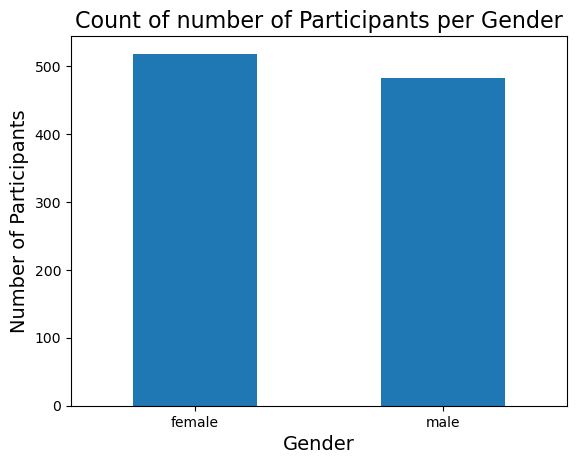

In [8]:
#plotting the no.of participants per gender
df['gender'].value_counts().plot(kind = 'bar')
plt.title('Count of number of Participants per Gender', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Number of Participants', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

2. What do you think about the students' parental level of education?

In [9]:
c = df['parental level of education'].value_counts()
c

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

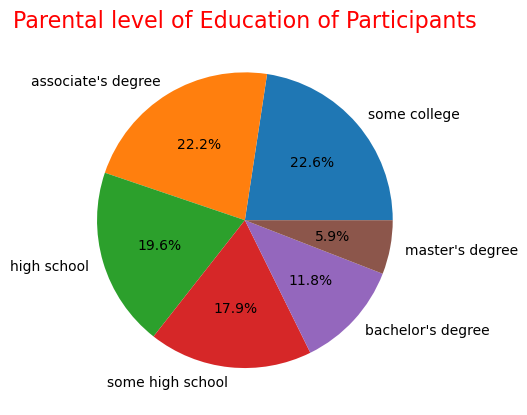

In [10]:
plt.pie(c, labels = c.index, autopct = '%0.1f%%', shadow = False)
plt.title('Parental level of Education of Participants', fontsize = 16, color = 'r')
plt.show()

Only less than one-fifth of participants' parents have completed bachelor's or master's degree.

About 45% of participants' parents have gone for college studies, but did not complete.

3. Who scores the most on average for math, reading and writing based on

● Gender

● Test preparation course

In [11]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


The female group excels in average reading and writing score, while the male group heads in average math scores

In [12]:
df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


The group that has completed the test preparation course, has the most scores on average for math, reading and writing.

4. What do you think about the scoring variation for math, reading and writing based on

● Gender

● Test preparation course

In [13]:
df.groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


The female group has the most variation on all math, reading and writing scores.

In [14]:
df.groupby('test preparation course').var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


The group that has not completed the test preparation course, has the most variations on all math, reading and writing scores.

5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [15]:
df['math score'].quantile(0.75)

77.0

The management can give bonus points to the students who have math score equal to or above 77.

In [16]:
df[df['math score'] >= 77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


Since there are 255 participants who got 77 or above in math score, the management fromcan either give bonus points to all of these participants in the list or remove 5 participants fram the list based on their reading and writing scores.